In [1]:
import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Распределение с суммой по строкам 1
(например, массовые доли)

In [3]:
n = 100
f = 10

In [4]:
idx=index=pd.date_range('2019-01-01', periods=n, freq='1d')
df=pd.DataFrame(np.random.dirichlet(np.ones(f), size=n))

In [5]:
# Сумма средних по столбцам == 1
df.mean().sum()

1.0

## Случайные пропуски

In [6]:
# Маска случайных пропусков
rand_mask=np.random.rand(100, 10)>0.5

In [7]:
#Со случайными пропущенными значениями
df.mask(rand_mask).mean().sum()

0.9985494362395901

Сумма средних массовых долей при отсутствии некоторых значений может быть не равна 1.

## Смесь нормальных распределений
технологические режимы

In [8]:
n_dist = 10
max_mean = 40
max_std = 5
max_len = 200
#TODO min параметры

In [9]:
params = (1 + np.random.rand(n_dist, 3) * [max_mean, max_std, max_len])
params = params.astype(int)

norm_mix = [np.random.normal(*p) for p in params]
# Без перемешивания по времени
norm_mix = np.hstack(norm_mix)
# TODO добавить шум
idx=index = pd.date_range('2019-01-01', periods=norm_mix.shape[0], freq='1h')
                   
norm_mix=pd.Series(norm_mix, index=idx)

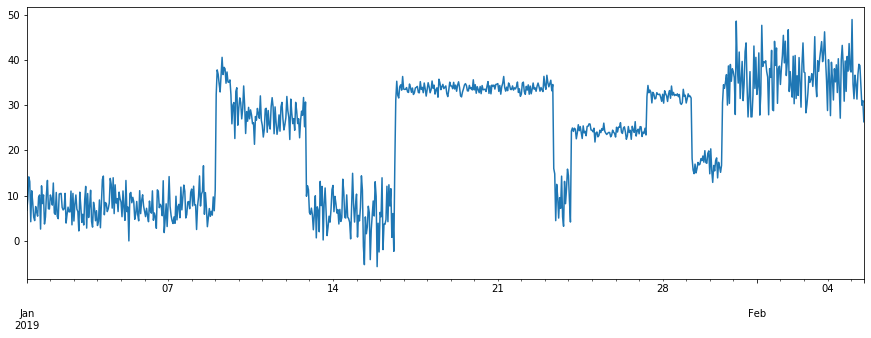

In [10]:
norm_mix.plot(figsize=(15, 5))